# Лабораторная работа 3 (1 часть)
## Решение уравнений параболического типа
## (1D уравнение теплопроводности)
Выполнил: Гапанович А. В. (4 группа)

Для решения дана следующая задача:
$$\frac{dU}{dt}=\alpha\frac{d^{2}U}{dt^{2}}+f(x,t), 0\leqslant x \leqslant L, t\geqslant 0 \\
U(x,t) = \varphi(x), 0\leqslant x\leqslant L\\
U(0,t) = \mu _{1}(t), U(L,t) = \mu _{2}(t), t\geqslant 0$$

С условиями:
$$\alpha =\frac{1}{2}, f(x,t) = -sin(t), \varphi= 1-sin(\pi x), \mu _{1}(t)=1, \mu _{2}(t)=1$$
Цель:
*   получить аналитическое решение
*   явная двухслойная схема (FTCS метод)
*   неявная двухслойная схема (BTCS метод)
*   неявный метод Кранка-Николсон
*   метод Ричардсона (перешагивания)
*   метод Дюфорта-Франкела



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time

In [3]:
alph = 0.5

l = 1
N_s = 40 #кол-во узлов по пространствен. коорд.

time_sum = 10
time_1 = 0.1
time_2 = 0.5
time_3 = 1
time_4 = 5
time_5 = 10

d_1 = 0.1
d_2 = 0.5
d_3 = 0.6
d_4 = 2.5

In [4]:
def border_left(t):
    return 1
def border_right(t):
    return 1
def fun_initial(x):
    return 1 - math.sin(x*math.pi)
def fun(t):
    return -(math.sin(t))

# 1.Численное решение

Решим задачу с помощью программного пакета Wolfram Mathemathica:
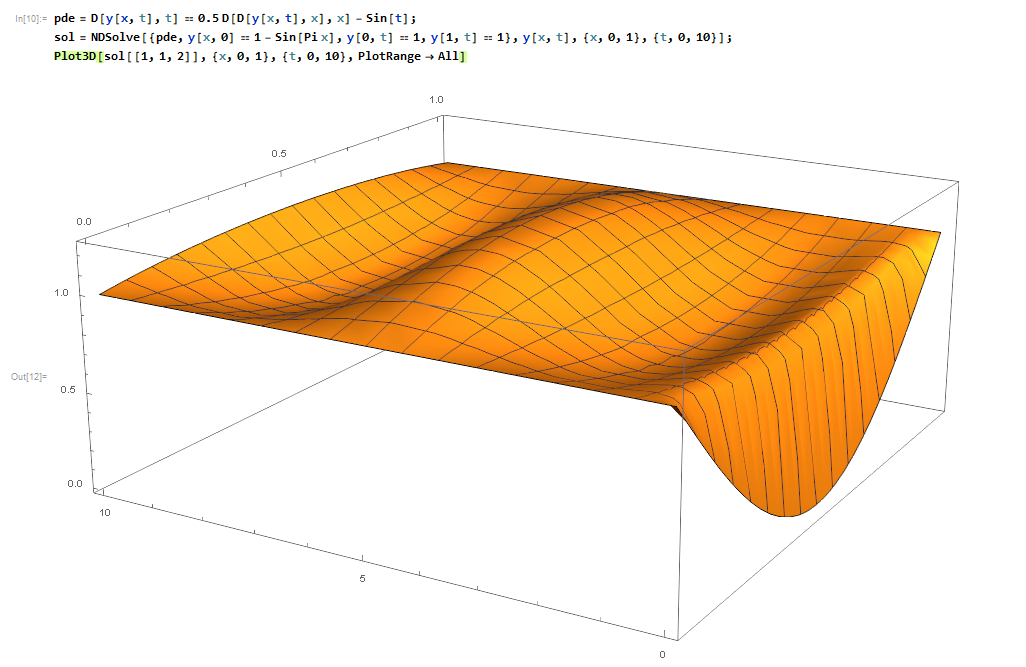

# 2.Явная двухслойная схема

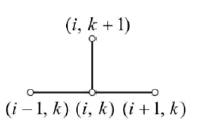

$$\frac{U_{k+1,i}-U_{k,i}}{\tau }=a^{2}\frac{U_{k,i-1}-2U_{k,i}+U_{k, i+1}}{h^{2}}+f(x,t)$$

In [21]:
def explicit_schem(N_s, d):
    h = l / N_s
    tau = d * (h * h) / alph
    N_t = int(time_sum / tau)
    print('Диффузионное число = ', d)
    
    matrix = np.zeros((N_t + 1, N_s + 1), dtype = float)
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i*h)
    for i in range(0, N_t + 1):
        matrix[i][0] = border_left(i * tau)
        matrix[i][N_s] = border_right(i * tau)
    for i in range(1, N_t + 1):
        for j in range(1, N_s):
            matrix[i][j] = (d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j]) 
                            + matrix[i - 1][j] 
                            + tau*fun(i*tau))
    return matrix

In [22]:
def draw_implicit_schem(d, time_1, time_2, time_3, time_4, time_5):
    matrix_2 = implicit_schem(N_s, d)
    N_t, size_x = np.shape(matrix_2)
    x = np.linspace(0, l, size_x) 
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Неявная двухслойная схема, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_2[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Неявная двухслойная схема, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Неявная двухслойная схема, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Неявная двухслойная схема, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Неявная двухслойная схема, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Неявная двухслойная схема, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_5-1, :])

Диффузионное число =  0.1


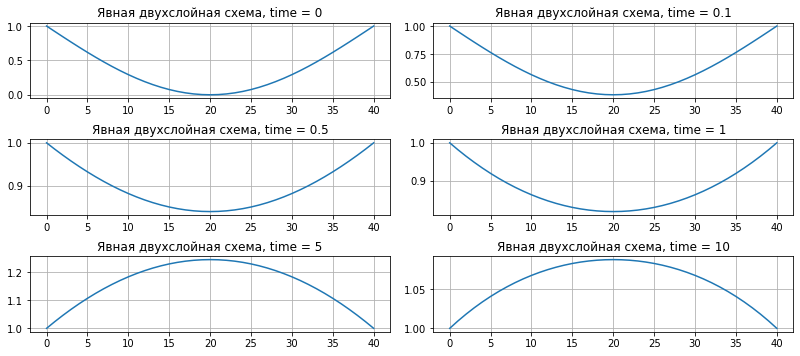

In [23]:
draw_explicit_schem(d_1, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.5


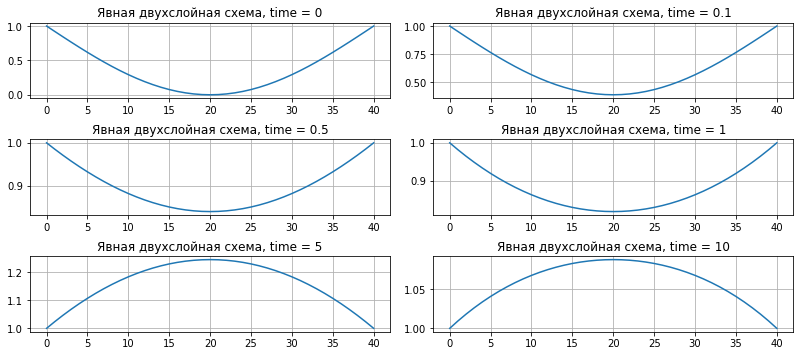

In [24]:
draw_explicit_schem(d_2, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.6


<ipython-input-21-d5de075e9d85>:14: RuntimeWarning: overflow encountered in double_scalars
  matrix[i][j] = d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j]) + matrix[i - 1][j] + tau*fun(i*tau)
<ipython-input-21-d5de075e9d85>:14: RuntimeWarning: invalid value encountered in double_scalars
  matrix[i][j] = d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j]) + matrix[i - 1][j] + tau*fun(i*tau)


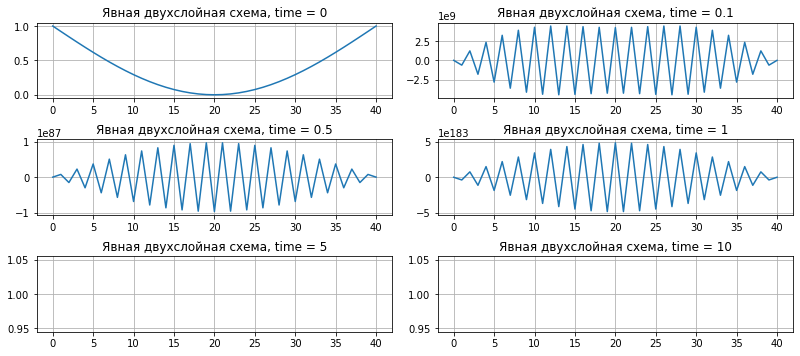

In [25]:
draw_explicit_schem(d_3, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  2.5


<ipython-input-21-d5de075e9d85>:14: RuntimeWarning: overflow encountered in double_scalars
  matrix[i][j] = d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j]) + matrix[i - 1][j] + tau*fun(i*tau)
<ipython-input-21-d5de075e9d85>:14: RuntimeWarning: invalid value encountered in double_scalars
  matrix[i][j] = d * (matrix[i - 1][j - 1] + matrix[i - 1][j + 1] - 2 * matrix[i - 1][j]) + matrix[i - 1][j] + tau*fun(i*tau)


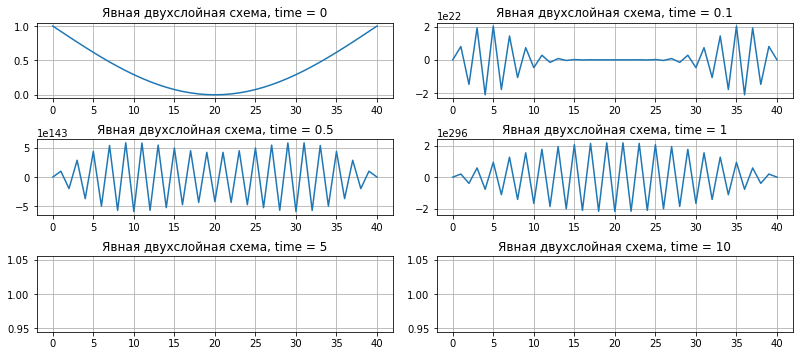

In [26]:
draw_explicit_schem(d_4, time_1, time_2, time_3, time_4, time_5)

# 3. Неявная двухслойная схема

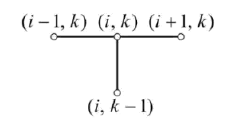

$$\frac{U_{k,i}-U_{k-1,i}}{\tau }=a^{2}\frac{U_{k,i-1}-2U_{k,i}+U_{k, i+1}}{h^{2}}+f(x,t)$$

In [18]:
def implicit_schem(N_s, d):
    h = l / N_s
    tau = d * (h * h) / alph
    A = -d
    B = 1+2*d
    C = -d
    N_t = int(time_sum / tau)
    print('Диффузионное число = ', d)
    matrix = np.zeros((N_t + 1, N_s + 1), dtype = float)
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i*h)
    for i in range(0, N_t + 1):
        matrix[i][0] = border_left(i * tau)
        matrix[i][N_s] = border_right(i * tau)
    alpha = [0.] * N_s 
    beta = [0.] * N_s 
    for i in range(1, int(N_t+1)):
        alpha[0] = 0. 
        beta[0] = matrix[i - 1][0]
        for j in range(1, N_s):
            alpha[j] = - C / (B + A * alpha[j - 1])
            beta[j] = (matrix[i - 1][j] - A * beta[j - 1]) / (B + A * alpha[j - 1])
        for j in reversed(range(1, N_s)):
            matrix[i][j] = alpha[j] * matrix[i][j + 1] + beta[j] + tau * fun(i * tau)
    return matrix

In [19]:
def draw_implicit_schem(d, time_1, time_2, time_3, time_4, time_5):
    matrix_2 = implicit_schem(N_s, d)
    N_t, size_x = np.shape(matrix_2)
    x = np.linspace(0, l, size_x) 
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Неявная двухслойная схема, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_2[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Неявная двухслойная схема, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Неявная двухслойная схема, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Неявная двухслойная схема, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Неявная двухслойная схема, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Неявная двухслойная схема, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_2[moment_5-1, :])

Диффузионное число =  0.1


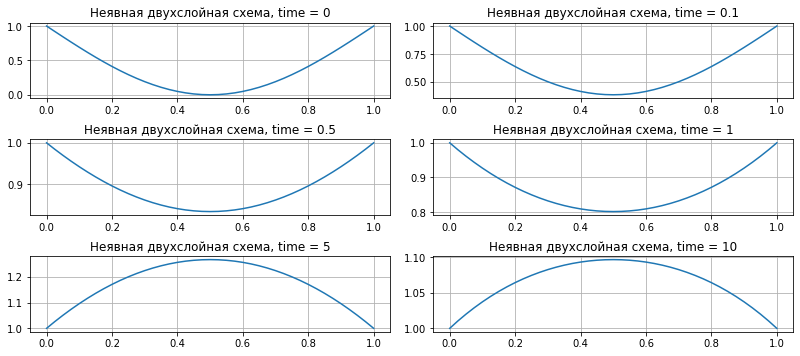

In [20]:
draw_implicit_schem(d_1, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.5


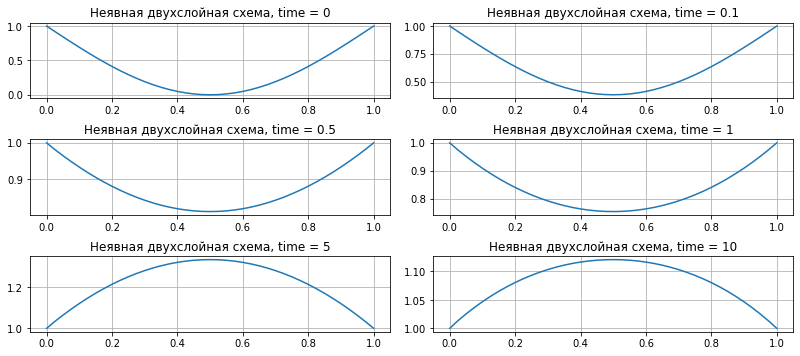

In [21]:
draw_implicit_schem(d_2, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.6


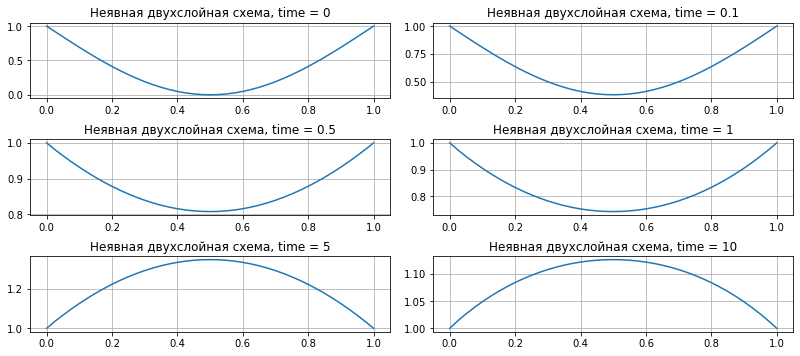

In [22]:
draw_implicit_schem(d_3, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  2.5


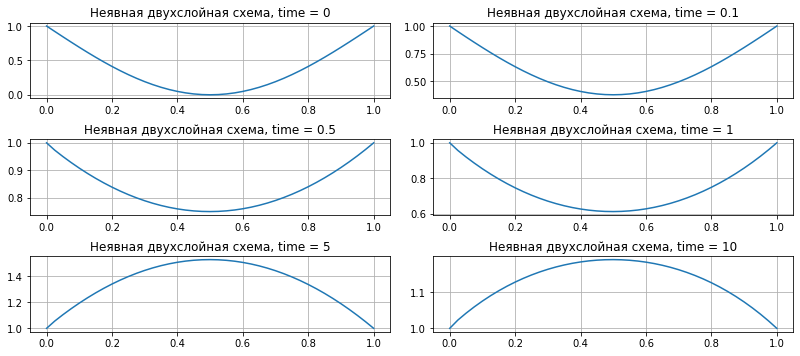

In [23]:
draw_implicit_schem(d_4, time_1, time_2, time_3, time_4, time_5)

# 4. Неявный метод Кранка-Николсон

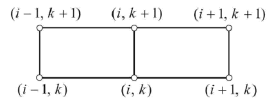

In [52]:
def Crank_Nicholson_schem(N_s, d):
    h = l / N_s
    tau = d * (h * h) / alph
    A = -d
    B = 2+2*d
    C = -d
    N_t = int(time_sum / tau)
    print('Диффузионное число = ', d)
    
    matrix = np.zeros((N_t + 1, N_s + 1), dtype = float)
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i*h)
    for i in range(0, N_t + 1):
        matrix[i][0] = border_left(i * tau)
        matrix[i][N_s] = border_right(i * tau)
    alpha = [0.] * N_s 
    beta = [0.] * N_s
    tmp = [0.] * N_s 
    for i in range(1, int(N_t + 1)):
        alpha[0] = 0. 
        beta[0] = matrix[i - 1][0]
        for j in range(1, N_s):
            tmp[j] = d * matrix[i - 1][j - 1] + (2 - 2 * d) * matrix[i - 1][j] + d * matrix[i - 1][j + 1]
            alpha[j] = - C / (B + A * alpha[j - 1])
            beta[j] = (tmp[j] - A * beta[j - 1]) / (B + A * alpha[j - 1])
        for j in reversed(range(1, N_s)):
            matrix[i][j] = alpha[j] * matrix[i][j + 1] + beta[j] +  tau * fun(i * tau)
    return matrix

In [53]:
def draw_Crank_Nicholson_schem(d, time_1, time_2, time_3, time_4, time_5):
    matrix_3 = Crank_Nicholson_schem(N_s, d)
    N_t, size_x = np.shape(matrix_3)
    x = np.linspace(0, l, size_x) 
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)
    
    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Схема Кранка-Николсон, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_3[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Схема Кранка-Николсон, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Схема Кранка-Николсон, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Схема Кранка-Николсон, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Схема Кранка-Николсон, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Схема Кранка-Николсон, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_3[moment_5-1, :])

Диффузионное число =  0.1


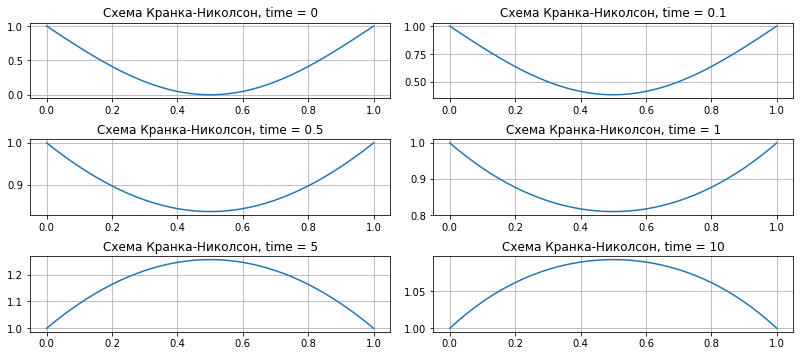

In [54]:
draw_Crank_Nicholson_schem(d_1, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.5


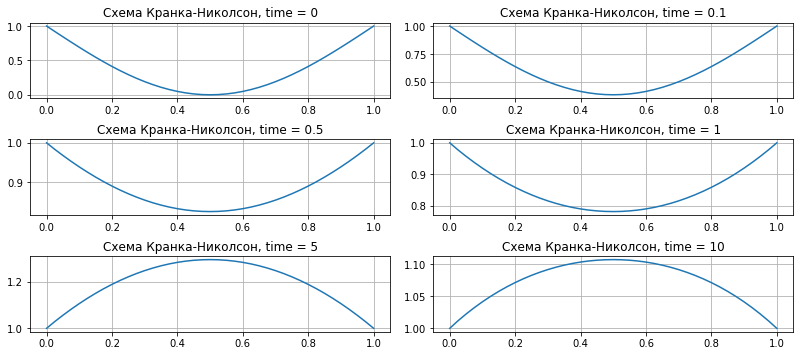

In [55]:
draw_Crank_Nicholson_schem(d_2, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.6


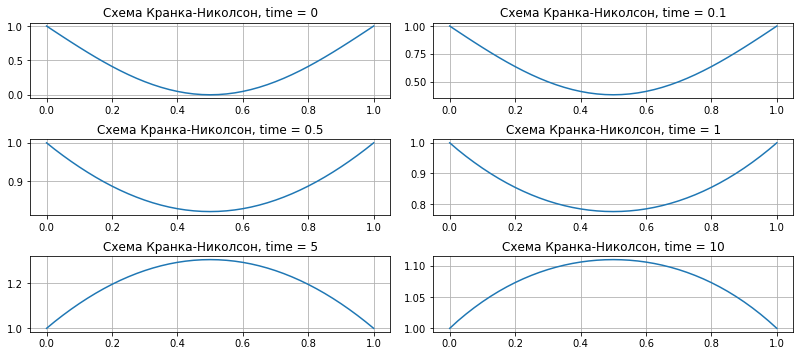

In [56]:
draw_Crank_Nicholson_schem(d_3, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  2.5


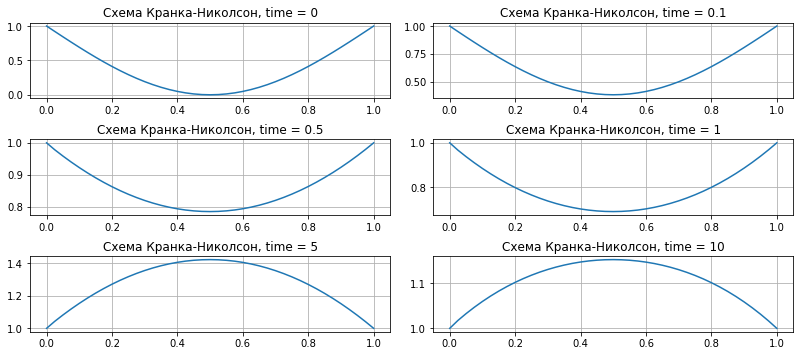

In [57]:
draw_Crank_Nicholson_schem(d_4, time_1, time_2, time_3, time_4, time_5)

# 5. Метод Ричардсона

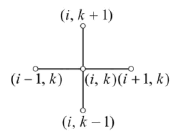

$$\frac{U_{k+1,i}-U_{k-1,i}}{2\tau }=a^{2}\frac{U_{k,i-1}-2U_{k,i}+U_{k, i+1}}{h^{2}}$$

In [36]:
def Richardsons_schem(N_s, d):
    h = l / N_s
    tau = d * (h * h) / alph
    N_t = int(time_sum / tau)
    print('Диффузионное число = ', d)
    
    matrix = np.zeros((N_t + 1, N_s + 1), dtype=float)
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i*h)
    for i in range(0, N_t + 1):
        matrix[i][0] = border_left(i * tau)
        matrix[i][N_s] = border_right(i * tau)
    for i in range(1, N_s):
        matrix[1][i] = matrix[0][i] + d * (matrix[0][i] + matrix[0][i] - 2 * matrix[0][i]) + tau*fun(tau)
    for i in range(2, int(N_t) + 1): 
        for j in range(1, N_s):
            matrix[i][j] = (matrix[i - 2][j] 
                            + 2 * d * (matrix[i - 1][j - 1] - 2 * matrix[i - 1][j] + matrix[i - 1][j + 1]) 
                            + 2 * tau * fun(j * tau))
    return matrix

In [39]:
def draw_Richardsons_schem(d, time_1, time_2, time_3, time_4, time_5):
    matrix_4 = Richardsons_schem(N_s, d)
    N_t, size_x = np.shape(matrix_4)
    x = np.linspace(0, l, size_x) 
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)

    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Схема Ричардсона, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_4[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Схема Ричардсона, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Схема Ричардсона, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Схема Ричардсона, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Схема Ричардсона, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Схема Ричардсона, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_4[moment_5-1, :])

Диффузионное число =  0.1


<ipython-input-36-753f3d2a142b>:18: RuntimeWarning: overflow encountered in double_scalars
  + 2 * d * (matrix[i - 1][j - 1] - 2 * matrix[i - 1][j] + matrix[i - 1][j + 1])


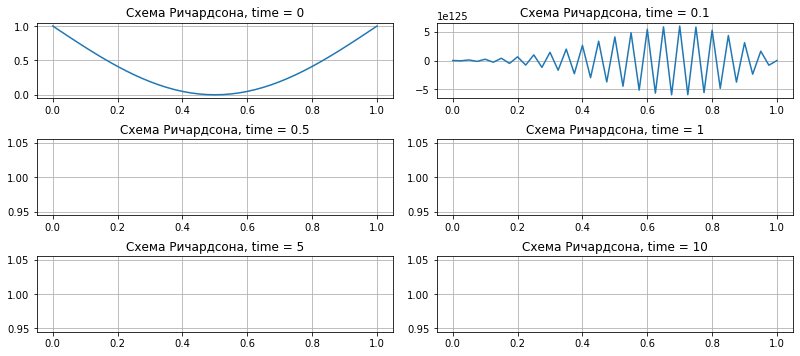

In [40]:
draw_Richardsons_schem(d_1, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.5


<ipython-input-36-753f3d2a142b>:17: RuntimeWarning: overflow encountered in double_scalars
  matrix[i][j] = (matrix[i - 2][j]
<ipython-input-36-753f3d2a142b>:18: RuntimeWarning: overflow encountered in double_scalars
  + 2 * d * (matrix[i - 1][j - 1] - 2 * matrix[i - 1][j] + matrix[i - 1][j + 1])


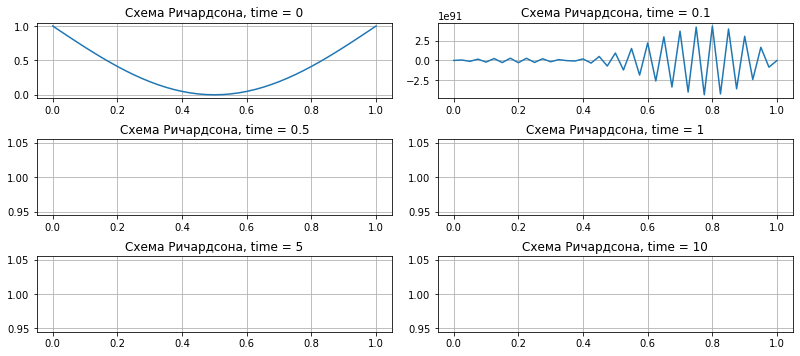

In [41]:
draw_Richardsons_schem(d_2, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.6


<ipython-input-36-753f3d2a142b>:18: RuntimeWarning: overflow encountered in double_scalars
  + 2 * d * (matrix[i - 1][j - 1] - 2 * matrix[i - 1][j] + matrix[i - 1][j + 1])
<ipython-input-36-753f3d2a142b>:17: RuntimeWarning: overflow encountered in double_scalars
  matrix[i][j] = (matrix[i - 2][j]


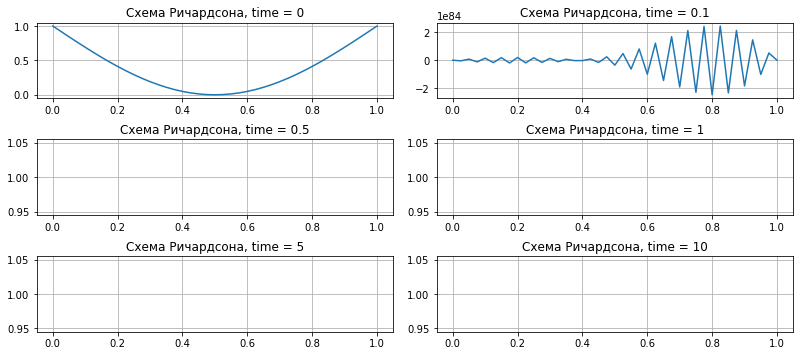

In [42]:
draw_Richardsons_schem(d_3, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  2.5


<ipython-input-36-753f3d2a142b>:18: RuntimeWarning: overflow encountered in double_scalars
  + 2 * d * (matrix[i - 1][j - 1] - 2 * matrix[i - 1][j] + matrix[i - 1][j + 1])
<ipython-input-36-753f3d2a142b>:18: RuntimeWarning: invalid value encountered in double_scalars
  + 2 * d * (matrix[i - 1][j - 1] - 2 * matrix[i - 1][j] + matrix[i - 1][j + 1])


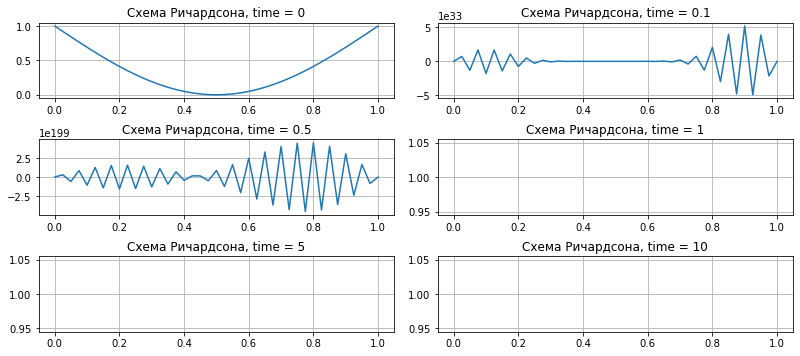

In [43]:
draw_Richardsons_schem(d_4, time_1, time_2, time_3, time_4, time_5)

# 6. Метод Дюфорта-Франкеля

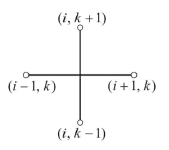

$$\frac{U_{k+1,i}-U_{-1,i}}{2\tau }=a^{2}\frac{U_{k,i+1}-U_{k+1,i}-U_{k-1,i}+U_{k, i-1}}{h^{2}}$$

In [44]:
def Dufort_Frankel_schem(N_s, d):
    h = l / N_s
    tau = d * (h * h) / alph
    N_t = int(time_sum / tau)
    print('Диффузионное число = ', d)
    
    matrix = np.zeros((N_t + 1, N_s + 1), dtype=float)
    for i in range(1, N_s):
        matrix[0][i] = fun_initial(i*h)
    for i in range(0, N_t + 1):
        matrix[i][0] = border_left(i * tau)
        matrix[i][N_s] = border_right(i * tau)
    for i in range(1, N_s):
        matrix[1][i] = matrix[0][i] + d * (matrix[0][i] + matrix[0][i] - 2 * matrix[0][i]) + tau*fun(tau)
    for i in range(2, int(N_t) + 1):
        for j in range(1, N_s):
            matrix[i][j] = (((2 * d) / (1 + 2 * d)) * (matrix[i - 1][j + 1] + matrix[i - 1][j - 1]) 
                            + (1 - 2 * d) / (1 + 2 * d) * matrix[i - 2][j]
                            + 2 * tau * fun(i * tau))
    return matrix

In [47]:
def draw_Dufort_Frankel_schem(d, time_1, time_2, time_3, time_4, time_5):
    matrix_5 = Dufort_Frankel_schem(N_s, d)
    N_t, size_x = np.shape(matrix_5)
    x = np.linspace(0, l, size_x) 
    moment_1 = int((N_t*time_1)/time_sum)
    moment_2 = int((N_t*time_2)/time_sum)
    moment_3 = int((N_t*time_3)/time_sum)
    moment_4 = int((N_t*time_4)/time_sum)
    moment_5 = int((N_t*time_5)/time_sum)

    fg = plt.figure(figsize=(11, 6), constrained_layout=True)
    gs = fg.add_gridspec(4, 2)
    fig_ax_1 = fg.add_subplot(gs[1, 0])
    plt.title('Схема Дюфорта-Франкеля, time = 0')
    plt.grid(True)
    plt.plot(x, matrix_5[0, :])
    fig_ax_2 = fg.add_subplot(gs[1, 1])
    plt.title('Схема Дюфорта-Франкеля, time = 0.1')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_1, :])
    fig_ax_3 = fg.add_subplot(gs[2, 0])
    plt.title('Схема Дюфорта-Франкеля, time = 0.5')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_2, :])
    fig_ax_4 = fg.add_subplot(gs[2, 1])
    plt.title('Схема Дюфорта-Франкеля, time = 1')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_3, :])
    fig_ax_5 = fg.add_subplot(gs[3, 0])
    plt.title('Схема Дюфорта-Франкеля, time = 5')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_4, :])
    fig_ax_6 = fg.add_subplot(gs[3, 1])
    plt.title('Схема Дюфорта-Франкеля, time = 10')
    plt.grid(True)
    plt.plot(x, matrix_5[moment_5-1, :])

Диффузионное число =  0.1


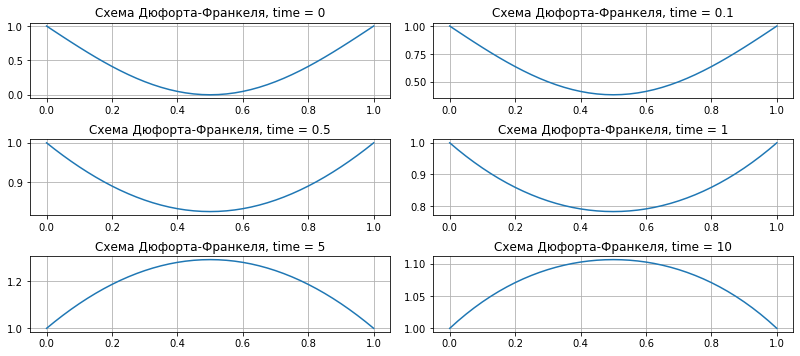

In [48]:
draw_Dufort_Frankel_schem(d_1, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.5


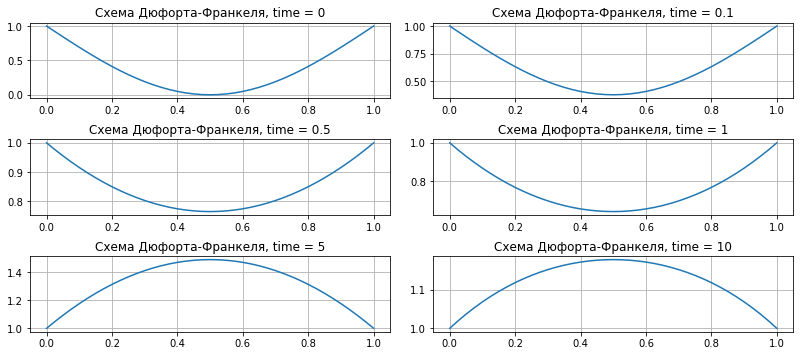

In [49]:
draw_Dufort_Frankel_schem(d_2, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  0.6


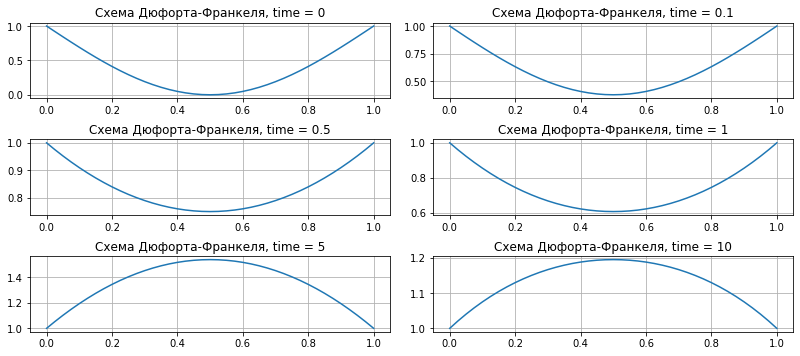

In [50]:
draw_Dufort_Frankel_schem(d_3, time_1, time_2, time_3, time_4, time_5)

Диффузионное число =  2.5


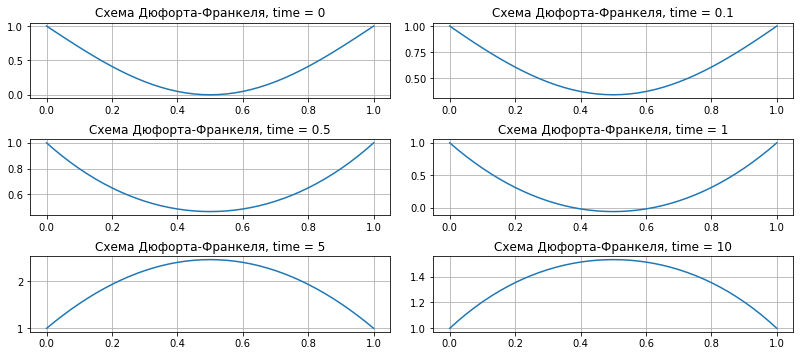

In [51]:
draw_Dufort_Frankel_schem(d_4, time_1, time_2, time_3, time_4, time_5)